In [47]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [48]:
df = pd.read_csv("tweets_BlackPink_5000.csv")
df.head()

,Unnamed: 0,tweet_text,user_screen_name,user_name,user_location,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,tweet_created_at,tweet_id,tweet_source,tweet_lang,tweet_quote_count,tweet_reply_count,tweet_retweet_count,tweet_favorite_count,source_tweet_text,is_retweet,source_user_screen_name,source_user_name,source_user_location,source_user_followers_count,source_user_friends_count,source_user_listed_count,source_user_favourites_count,source_tweet_created_at,source_tweet_id,source_tweet_source,source_tweet_lang,source_tweet_quote_count,source_tweet_reply_count,source_tweet_retweet_count,source_tweet_favorite_count
0,0,RT @JNCHARTS: [210121] JENNIE | INSTAGRAM\n\nM...,punkishbIack,`,she/her,28,264,0,14252,Fri Jan 22 06:41:49 +0000 2021,1352506736859484161,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en,0,0,0,0,[210121] JENNIE | INSTAGRAM\n\nMost followed f...,True,JNCHARTS,JENNIE CHARTS,NaN,20506.0,35.0,204.0,1458.0,Thu Jan 21 16:41:35 +0000 2021,1.352295e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en,9.0,0.0,174.0,537.0
1,1,OMG! I cant wait! I have a class on that day ...,BehindThePinks,both no?,NaN,41,143,0,3211,Fri Jan 22 06:41:48 +0000 2021,1352506736481996801,"<a href=""http://twitter.com/download/iphone"" r...",en,0,0,0,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,RT @daveypinks: WTF? SHE LOOK HELLA HOT WITH T...,yunhoesmadz,21:59,BLACKPINK's World,232,985,1,86535,Fri Jan 22 06:41:49 +0000 2021,1352506738189115395,"<a href=""http://twitter.com/download/android"" ...",en,0,0,0,0,WTF? SHE LOOK HELLA HOT WITH THAT RED LIPSTICK...,True,daveypinks,NaN,pinks,39174.0,553.0,133.0,16051.0,Fri Jan 22 05:51:04 +0000 2021,1.352494e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en,54.0,9.0,1057.0,2851.0
3,3,RT @_mandeukie: what's stopping you both from ...,DarkPizza_21,; Kya - MY BIRTHDAY,NaN,153,390,0,38312,Fri Jan 22 06:41:49 +0000 2021,1352506738885451776,"<a href=""http://twitter.com/download/android"" ...",en,0,0,0,0,what's stopping you both from having a dance c...,True,_mandeukie,des,s/her || EXO's,2273.0,864.0,31.0,93901.0,Thu Jan 21 15:25:32 +0000 2021,1.352276e+18,"<a href=""http://twitter.com/download/android"" ...",en,5.0,1.0,29.0,141.0
4,4,RT @translatebp: News @BLACKPINK #ROS\n\nEven...,fatlalalaleo,#sw,JENCHULICHEANG,95,513,0,20159,Fri Jan 22 06:41:49 +0000 2021,1352506739157917697,"<a href=""http://twitter.com/download/android"" ...",en,0,0,0,0,News @BLACKPINK #ROS\n\nEven Saint Laurent wa...,True,translatebp,beonyeok,any pronouns,1504.0,34.0,16.0,62.0,Fri Jan 22 06:08:54 +0000 2021,1.352498e+18,"<a href=""http://twitter.com/download/iphone"" r...",en,2.0,6.0,36.0,82.0


# **Data Cleaning**

In [49]:
clean = df[["Unnamed: 0", "tweet_text"]]
clean

,Unnamed: 0,tweet_text
0,0,RT @JNCHARTS: [210121] JENNIE | INSTAGRAM\n\nM...
1,1,OMG! I cant wait! I have a class on that day ...
2,2,RT @daveypinks: WTF? SHE LOOK HELLA HOT WITH T...
3,3,RT @_mandeukie: what's stopping you both from ...
4,4,RT @translatebp: News @BLACKPINK #ROS\n\nEven...
...,...,...
4995,4995,"RT @StayWithLalis: In 2019, #LISA's ad for @AI..."
4996,4996,RT @GlobalBlackPink: #BLACKPINK is currently t...
4997,4997,"RT @glamorosePH: 7 LUCKY BLINKS, WILL WIN A PL..."
4998,4998,RT @adorable__JS: The Cover girl of &lt;W Kore...


In [50]:
#Split RT:

clean["RT"] = clean["tweet_text"].str.startswith('RT ')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
clean.RT.value_counts()

True     4316
False     684
Name: RT, dtype: int64

In [52]:
clean["RT"] = clean['RT'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
clean.loc[clean["RT"].str.contains('True', case=False, na = False), "RT"] = "Retweet"
clean.loc[clean["RT"].str.contains('False', case=False, na = False), "RT"] = "Tweet"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [54]:
clean["RT"].value_counts()

Retweet    4316
Tweet       684
Name: RT, dtype: int64

In [55]:
clean["Hashtag"] = clean["tweet_text"].str.contains('#')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
clean["Hashtag"].value_counts()

False    2586
True     2414
Name: Hashtag, dtype: int64

In [57]:
clean

,Unnamed: 0,tweet_text,RT,Hashtag
0,0,RT @JNCHARTS: [210121] JENNIE | INSTAGRAM\n\nM...,Retweet,True
1,1,OMG! I cant wait! I have a class on that day ...,Tweet,True
2,2,RT @daveypinks: WTF? SHE LOOK HELLA HOT WITH T...,Retweet,True
3,3,RT @_mandeukie: what's stopping you both from ...,Retweet,False
4,4,RT @translatebp: News @BLACKPINK #ROS\n\nEven...,Retweet,True
...,...,...,...,...
4995,4995,"RT @StayWithLalis: In 2019, #LISA's ad for @AI...",Retweet,True
4996,4996,RT @GlobalBlackPink: #BLACKPINK is currently t...,Retweet,True
4997,4997,"RT @glamorosePH: 7 LUCKY BLINKS, WILL WIN A PL...",Retweet,False
4998,4998,RT @adorable__JS: The Cover girl of &lt;W Kore...,Retweet,False


# **QB1. Ten Most Popular Words with and without Stop Words**



In [58]:
#Import counter and packages:

from collections import Counter
import pandas as pd
import nltk
nltk.download("stopwords")
stop_words = stopwords.words('english')

#Add "#" into List:
stop_words.append("#")
stop_words.append("RT")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
# Ten Most Popular Words WITH Stop Words:
clean["tweet_text"].str.split(expand=True).stack().value_counts().head(10)

RT            4343
to            1847
the           1833
@BLACKPINK    1564
is            1513
their         1195
of            1111
#BLACKPINK     917
impact         898
a              832
dtype: int64

In [60]:
# Ten Most Popular Words WITHOUT Stop Words:
no_stop_words = clean['tweet_text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))

In [61]:
no_stop_words.str.split(expand=True).stack().value_counts().head(10)

@BLACKPINK      1564
#BLACKPINK       917
impact           898
THE              829
@daveypinks:     733
one              625
going            598
share            579
day              576
CHECK            572
dtype: int64

In [62]:
clean

,Unnamed: 0,tweet_text,RT,Hashtag
0,0,RT @JNCHARTS: [210121] JENNIE | INSTAGRAM\n\nM...,Retweet,True
1,1,OMG! I cant wait! I have a class on that day ...,Tweet,True
2,2,RT @daveypinks: WTF? SHE LOOK HELLA HOT WITH T...,Retweet,True
3,3,RT @_mandeukie: what's stopping you both from ...,Retweet,False
4,4,RT @translatebp: News @BLACKPINK #ROS\n\nEven...,Retweet,True
...,...,...,...,...
4995,4995,"RT @StayWithLalis: In 2019, #LISA's ad for @AI...",Retweet,True
4996,4996,RT @GlobalBlackPink: #BLACKPINK is currently t...,Retweet,True
4997,4997,"RT @glamorosePH: 7 LUCKY BLINKS, WILL WIN A PL...",Retweet,False
4998,4998,RT @adorable__JS: The Cover girl of &lt;W Kore...,Retweet,False


# **Q2B. Ten Most Popular Hashtags**

In [63]:
clean['tweet_text'].str.extractall(r'(\#\w+)')[0].value_counts().head(10)

#BLACKPINK    952
#JISOO        632
#1            161
#LISA         151
#ROS          129
#3            112
#2            101
#6             99
#JENNIE        76
#4             73
Name: 0, dtype: int64

# **Q2C. Ten Most Popular Mentioned Usernames**

In [115]:
clean['tweet_text'].str.extractall(r'(\@\w+)')[0].value_counts().head(10)

@BLACKPINK          2159
@daveypinks          737
@cyanblink           252
@ygent_official      222
@chartsblackpink     203
@sexckjn             105
@betoolibertie        98
@chaechuyaaa          95
@Koreaboo             79
@BLACKPINKs           76
Name: 0, dtype: int64

# **Q2D. Most Frequently appeared Usernames**

In [65]:
df["user_screen_name"].value_counts().head(10)

BlackPinkMXC       29
jesseleyaaa_       29
twicepink3raavi    25
i_love_lisa27      25
nyan_nyan_cs       23
ImranIm74204884    22
jenduekieeeee_m    18
tayrianastan       18
jrjk01996          16
airyyka18          16
Name: user_screen_name, dtype: int64

# **Q2E. Who is the most influential user?**

In [66]:
df["RT"] = clean["RT"]
df["Hashtag"] = clean["Hashtag"]

In [67]:
df[(df["RT"]=="Retweet")]

,Unnamed: 0,tweet_text,user_screen_name,user_name,user_location,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,tweet_created_at,tweet_id,tweet_source,tweet_lang,tweet_quote_count,tweet_reply_count,tweet_retweet_count,tweet_favorite_count,source_tweet_text,is_retweet,source_user_screen_name,source_user_name,source_user_location,source_user_followers_count,source_user_friends_count,source_user_listed_count,source_user_favourites_count,source_tweet_created_at,source_tweet_id,source_tweet_source,source_tweet_lang,source_tweet_quote_count,source_tweet_reply_count,source_tweet_retweet_count,source_tweet_favorite_count,RT,Hashtag
0,0,RT @JNCHARTS: [210121] JENNIE | INSTAGRAM\n\nM...,punkishbIack,`,she/her,28,264,0,14252,Fri Jan 22 06:41:49 +0000 2021,1352506736859484161,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en,0,0,0,0,[210121] JENNIE | INSTAGRAM\n\nMost followed f...,True,JNCHARTS,JENNIE CHARTS,NaN,20506.0,35.0,204.0,1458.0,Thu Jan 21 16:41:35 +0000 2021,1.352295e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en,9.0,0.0,174.0,537.0,Retweet,True
2,2,RT @daveypinks: WTF? SHE LOOK HELLA HOT WITH T...,yunhoesmadz,21:59,BLACKPINK's World,232,985,1,86535,Fri Jan 22 06:41:49 +0000 2021,1352506738189115395,"<a href=""http://twitter.com/download/android"" ...",en,0,0,0,0,WTF? SHE LOOK HELLA HOT WITH THAT RED LIPSTICK...,True,daveypinks,NaN,pinks,39174.0,553.0,133.0,16051.0,Fri Jan 22 05:51:04 +0000 2021,1.352494e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en,54.0,9.0,1057.0,2851.0,Retweet,True
3,3,RT @_mandeukie: what's stopping you both from ...,DarkPizza_21,; Kya - MY BIRTHDAY,NaN,153,390,0,38312,Fri Jan 22 06:41:49 +0000 2021,1352506738885451776,"<a href=""http://twitter.com/download/android"" ...",en,0,0,0,0,what's stopping you both from having a dance c...,True,_mandeukie,des,s/her || EXO's,2273.0,864.0,31.0,93901.0,Thu Jan 21 15:25:32 +0000 2021,1.352276e+18,"<a href=""http://twitter.com/download/android"" ...",en,5.0,1.0,29.0,141.0,Retweet,False
4,4,RT @translatebp: News @BLACKPINK #ROS\n\nEven...,fatlalalaleo,#sw,JENCHULICHEANG,95,513,0,20159,Fri Jan 22 06:41:49 +0000 2021,1352506739157917697,"<a href=""http://twitter.com/download/android"" ...",en,0,0,0,0,News @BLACKPINK #ROS\n\nEven Saint Laurent wa...,True,translatebp,beonyeok,any pronouns,1504.0,34.0,16.0,62.0,Fri Jan 22 06:08:54 +0000 2021,1.352498e+18,"<a href=""http://twitter.com/download/iphone"" r...",en,2.0,6.0,36.0,82.0,Retweet,True
5,5,RT @LEGENDHARMONY: yge gave the name baby mons...,CrewofBPQueens,Yel,NaN,255,368,1,67700,Fri Jan 22 06:41:49 +0000 2021,1352506739753512962,"<a href=""http://twitter.com/download/iphone"" r...",en,0,0,0,0,yge gave the name baby monster to their new gg...,True,LEGENDHARMONY,kayla,ot4,12321.0,4936.0,26.0,21341.0,Fri Jan 22 05:10:17 +0000 2021,1.352484e+18,"<a href=""http://twitter.com/download/iphone"" r...",en,92.0,12.0,140.0,644.0,Retweet,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,"RT @StayWithLalis: In 2019, #LISA's ad for @AI...",bprtbot,RS1 IS COMING,NaN,823,1610,0,34683,Fri Jan 22 07:05:19 +0000 2021,1352512652967170048,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en,0,0,0,0,"In 2019, #LISA's ad for @AIS_Thailand and @Sam...",True,StayWithLalis,For,Instagram/Weibo: lalalalisa_m,5737.0,117.0,21.0,469.0,Thu Jan 21 13:06:14 +0000 2021,1.352241e+18,"<a href=""http://twitter.com/download/android"" ...",en,5.0,0.0,287.0,605.0,Retweet,True
4996,4996,RT @GlobalBlackPink: #BLACKPINK is currently t...,RBlckpnks,APAN RIGGED AWARD SHOW,NaN,36,205,0,5196,Fri Jan 22 07:05:19 +0000 2021,1352512653101559809,"<a href=""http://twitter.com/download/android"" ...",en,0,0,0,0,#BLACKPINK is currently trending #1 on MelOn R...,True,GlobalBlackPink,GLOBAL BLACKPINK #THESHOW,NaN,328694.0,188.0,912.0,3743.0,Fri Jan 22 01:15:00 +0000 2021,1.352424e+18,"<a href

In [68]:
rt = df[(df["RT"]=="Retweet")]

In [69]:
nrt = df[(df["RT"]=="Tweet")]

In [70]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4316 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    4316 non-null   int64  
 1   tweet_text                    4316 non-null   object 
 2   user_screen_name              4316 non-null   object 
 3   user_name                     3864 non-null   object 
 4   user_location                 1924 non-null   object 
 5   user_followers_count          4316 non-null   int64  
 6   user_friends_count            4316 non-null   int64  
 7   user_listed_count             4316 non-null   int64  
 8   user_favourites_count         4316 non-null   int64  
 9   tweet_created_at              4316 non-null   object 
 10  tweet_id                      4316 non-null   int64  
 11  tweet_source                  4314 non-null   object 
 12  tweet_lang                    4316 non-null   object 
 13  twe

In [71]:
nrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 1 to 4990
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    684 non-null    int64  
 1   tweet_text                    684 non-null    object 
 2   user_screen_name              684 non-null    object 
 3   user_name                     619 non-null    object 
 4   user_location                 402 non-null    object 
 5   user_followers_count          684 non-null    int64  
 6   user_friends_count            684 non-null    int64  
 7   user_listed_count             684 non-null    int64  
 8   user_favourites_count         684 non-null    int64  
 9   tweet_created_at              684 non-null    object 
 10  tweet_id                      684 non-null    int64  
 11  tweet_source                  684 non-null    object 
 12  tweet_lang                    684 non-null    object 
 13  twee

In [72]:
nrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 1 to 4990
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    684 non-null    int64  
 1   tweet_text                    684 non-null    object 
 2   user_screen_name              684 non-null    object 
 3   user_name                     619 non-null    object 
 4   user_location                 402 non-null    object 
 5   user_followers_count          684 non-null    int64  
 6   user_friends_count            684 non-null    int64  
 7   user_listed_count             684 non-null    int64  
 8   user_favourites_count         684 non-null    int64  
 9   tweet_created_at              684 non-null    object 
 10  tweet_id                      684 non-null    int64  
 11  tweet_source                  684 non-null    object 
 12  tweet_lang                    684 non-null    object 
 13  twee

5a. Most Influential User (RT & NRT)

In [73]:
#Most Influential User (Retweets)
rt["Influencer Score"] = rt[["user_followers_count", "user_friends_count", "user_listed_count", "user_favourites_count", "tweet_quote_count", "tweet_reply_count", "tweet_retweet_count", "tweet_favorite_count", "source_user_followers_count", "source_user_friends_count", "source_user_listed_count", "source_user_favourites_count", "source_tweet_quote_count", "source_tweet_reply_count", "source_tweet_retweet_count", "source_tweet_favorite_count"]].sum(axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
rt[rt["Influencer Score"]==rt["Influencer Score"].max()]["user_screen_name"]

4097    zh_prk
Name: user_screen_name, dtype: object

In [76]:
#Most Influential User (Not a Retweet)

nrt["Influencer Score"] = nrt[["user_followers_count", "user_friends_count", "user_listed_count", "user_favourites_count"]].sum(axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
nrt_maxscore = nrt["Influencer Score"].max()
nrt[nrt["Influencer Score"]==nrt_maxscore]["user_screen_name"]

306    pinkvilla
Name: user_screen_name, dtype: object

In [78]:
nrt.loc[306]

Unnamed: 0                                                                    306
tweet_text                      Dear Eonni: An Indian BLINK reveals BLACKPINK ...
user_screen_name                                                        pinkvilla
user_name                                                               Pinkvilla
user_location                                                       Mumbai, India
user_followers_count                                                       942871
user_friends_count                                                            755
user_listed_count                                                             582
user_favourites_count                                                         481
tweet_created_at                                   Fri Jan 22 06:43:23 +0000 2021
tweet_id                                                      1352507131354771456
tweet_source                    <a href="https://mobile.twitter.com" rel="nofo...
tweet_lang      

5b. Most Influential Tweet

In [79]:
#Most Influential Tweet (Retweets)

rt["Tweet Score"] = rt[["tweet_quote_count", "tweet_reply_count", "tweet_retweet_count", "tweet_favorite_count", "source_user_followers_count", "source_user_friends_count", "source_user_listed_count", "source_user_favourites_count", "source_tweet_quote_count", "source_tweet_reply_count", "source_tweet_retweet_count", "source_tweet_favorite_count"]].sum(axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
rt_tweet_max_score = rt["Tweet Score"].max()
rt[rt["Tweet Score"]==rt_tweet_max_score]["user_screen_name"]

4097    zh_prk
Name: user_screen_name, dtype: object

In [81]:
#Most Influential Tweet (No Retweet)

nrt["Tweet Score"] = nrt[["tweet_quote_count", "tweet_reply_count", "tweet_retweet_count", "tweet_favorite_count"]].sum(axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
nrt["Tweet Score"].max()

0

In [83]:
nrt[nrt["Tweet Score"]==0]["user_screen_name"]

1        BehindThePinks
17           iFINELINES
18           plnkthugga
25              chies74
32      lilsunflower_xx
             ...       
4926       liliesrosies
4939           demisuho
4943         yadomppong
4971            SLett29
4990     chujangnim____
Name: user_screen_name, Length: 684, dtype: object

In [84]:
#Non-conclusive for NRT Most Influential Tweet Score.

# **C1 - Wordcloud**

In [99]:
words = no_stop_words.str.split(expand=True).stack().tolist()

master_words=[]

for t in words:
    for i in t.split():
        if not i.startswith("https"):
            master_words.append(i)

In [118]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

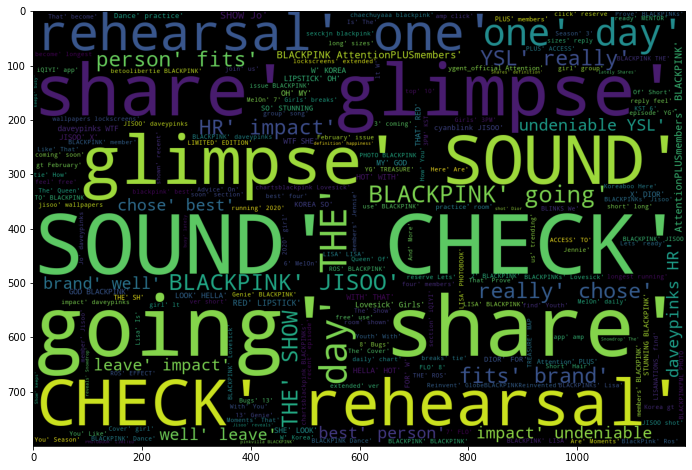

In [117]:
#Tweets Wordcloud:

wordcloud = WordCloud(width=1200, height=800).generate(str(master_words))

# Display the generated image:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud) 

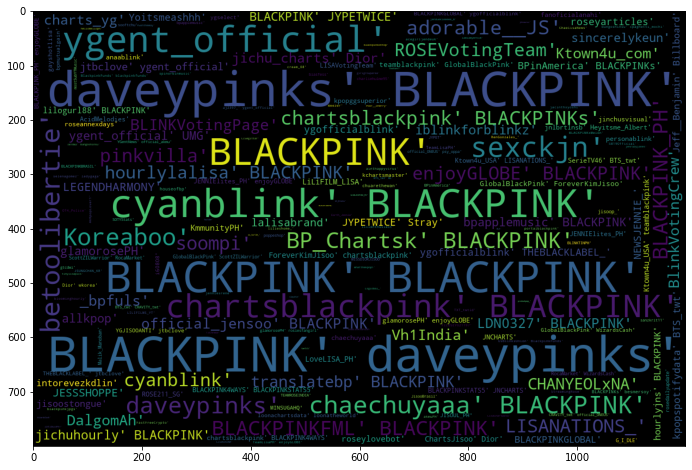

In [112]:
#Callouts Wordcloud:

callouts = clean['tweet_text'].str.extractall(r'(\@\w+)')[0].tolist()

wordcloud = WordCloud(width=1200, height=800).generate(str(callouts))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud) 

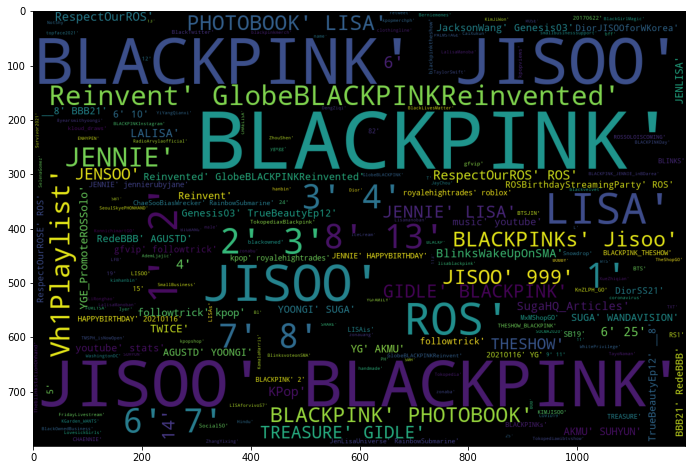

In [116]:
#Hashtags Wordcloud:

hashtag_lyfe = clean['tweet_text'].str.extractall(r'(\#\w+)')[0].tolist()

wordcloud = WordCloud(width=1200, height=800).generate(str(hashtag_lyfe))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud) 